###### The original MATLAB code was developed by Prof. Hyunseok Oh (Gwangju Institute of Science and Technology, South Korea, hsoh@gist.ac.kr).

# SVM with Kernel Scale Change

In [1]:
##### Load Data and function----------------------------------------------------------------------
load('saved_data/pca.rds')
source('subfunction/data_partition_manual.R')

In [3]:
##### SVM with Kernel Scale Change ---------------------------------------------------------------
library(e1071)
Valid_accuracy <- NULL

pca_data <- score[, 1:2]

# Set Training, Test, Validation Data
data_partition_manual(pca_data)

scale_value <- 1 / c(0.01, 0.1, 0.5, 1, 1.5, 2, 10)^2

for (i in seq(scale_value)) {
  Gaussian_SVM <- svm(y = train_label, x = train_data, data = data.frame(train_data, train_label),
                   type = 'C-classification',
                   cost = 1,
                   kernel = 'radial',
                   gamma = i)
  
  accuracy <- sum(predict(Gaussian_SVM, valid_data) == valid_label) / length(valid_label) * 100
  Valid_accuracy[i] <- accuracy
}

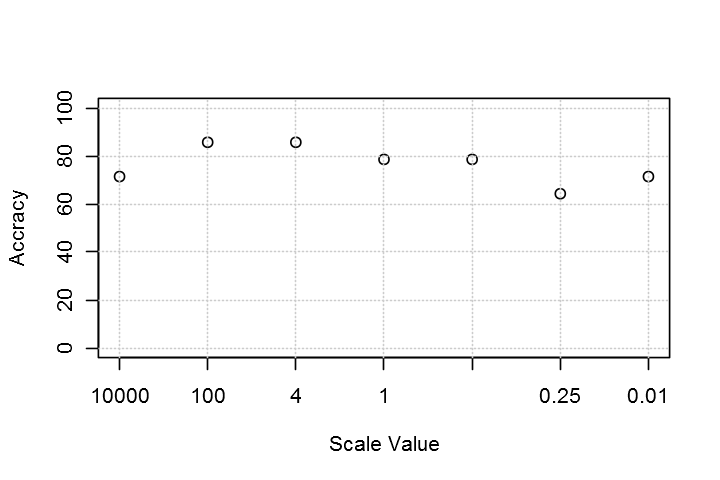

In [4]:
##### Plot Validation Accuracy -------------------------------------------------------------------
options(repr.plot.width = 6, repr.plot.height = 4)
plot(Valid_accuracy, ylim = c(0, 100), xaxt = "n", #xaxs = 'i', yaxs = 'i',
     xlab = "Scale Value", ylab = "Accracy")
axis(side = 1, at = 1:7, labels = scale_value)
abline(h = seq(0, 100, 20), v = 1:7, lty = 3, col = gray(0.8))

In [ ]:
##### Data Save ----------------------------------------------------------------------------------
save(train_data, train_label, test_data, test_label, valid_data, valid_label,
     file = 'saved_data/train_test_valid_data.rds')